Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# loade the data
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

## Data Exploration

In [3]:
#Checking for null vcalues
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
#Checking for duplicate values
fraud_data[fraud_data.duplicated()]

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []

In [6]:
fraud_data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

As we show that the data are not in the same scale. So, to bring it in same scale we should standardize it in pre-processing.

In [7]:
# Converting taxiabl income  in categorical as mention in question
fraud_data['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [8]:
# Converting the Target column i.e. Taxable Income into Categorical value
data=fraud_data.copy()
tax_val = []
for value in fraud_data["Taxable.Income"]:
 if value<=30000:
    tax_val.append("Risky")
 else:
    tax_val.append("Good")
data["tax_val"]= tax_val
data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban tax_val  
0   YES    Good  
1   YES    Good  
2   YES    Good  
3   YES    Good  
4    NO    Good

In [9]:
data['tax_val'].value_counts()

Good     476
Risky    124
Name: tax_val, dtype: int64

In [10]:
# List of Numerical Variables 
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

In [11]:
# categorical variables 
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'tax_val'], dtype='object')

In [12]:
# check for cardinality in categorical variables
for var in categorical_features:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Undergrad  contains  2  labels
Marital.Status  contains  3  labels
Urban  contains  2  labels
tax_val  contains  2  labels


As we show that labels are not must large so we shoud use dummies encoder to convert it in numeric

## Exploratory Data Analysis

In [13]:
# checking for correlation
data.corr()

Taxable.Income  City.Population  Work.Experience
Taxable.Income         1.000000        -0.064387        -0.001818
City.Population       -0.064387         1.000000         0.013135
Work.Experience       -0.001818         0.013135         1.000000

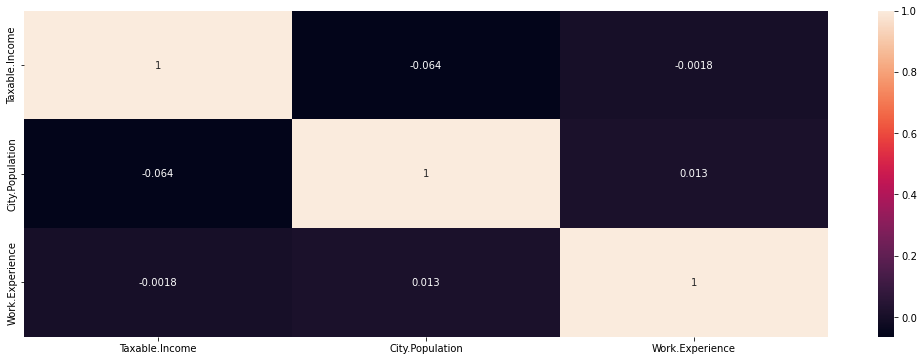

In [14]:
# Heatmap visualization
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);

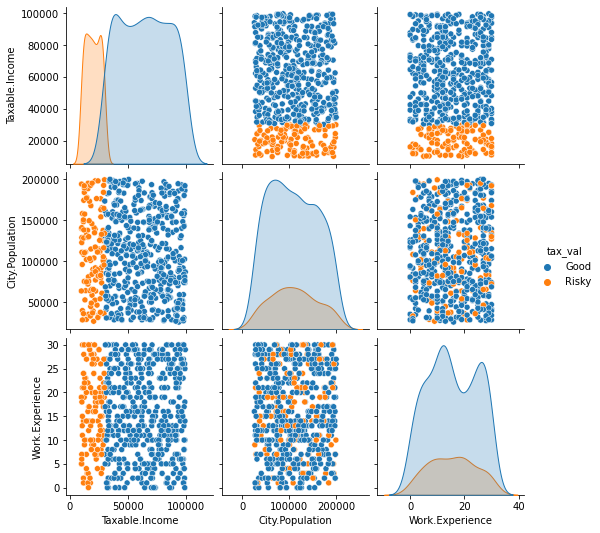

In [15]:
# pair plot data 
sns.pairplot(data=data,hue='tax_val')


By visualization of heatmap and pair plot we say that their are no correlation between features.

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


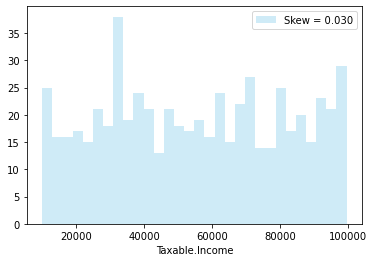

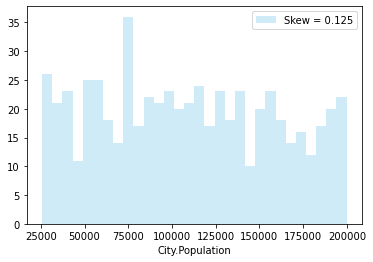

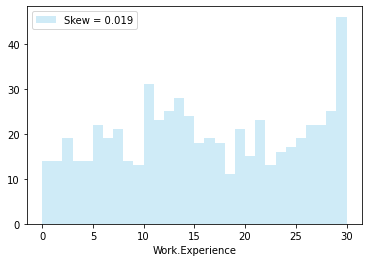

In [16]:
# Histogram visualization of numeric variables
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False,color='skyblue', label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()


None of the features is normally distributed.Advertising have high skew so we shoud check for outliers by ploting boxplot.

<AxesSubplot:xlabel='Work.Experience'>

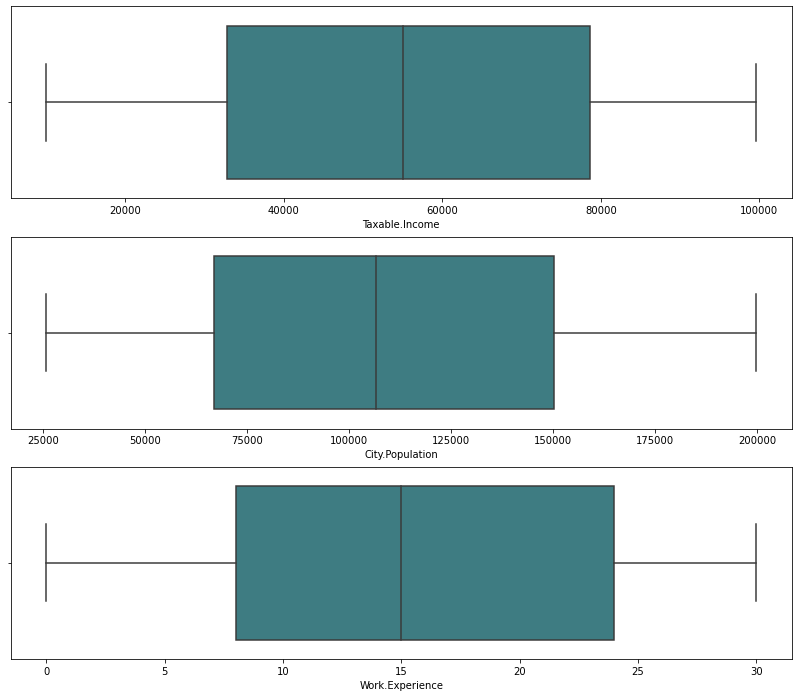

In [17]:
# Checking for outliers
fig, axes=plt.subplots(3,1,squeeze=True,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=data,palette='crest',ax=axes[2])


Their is no outlier present in the dataset

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\si

<AxesSubplot:xlabel='tax_val', ylabel='count'>

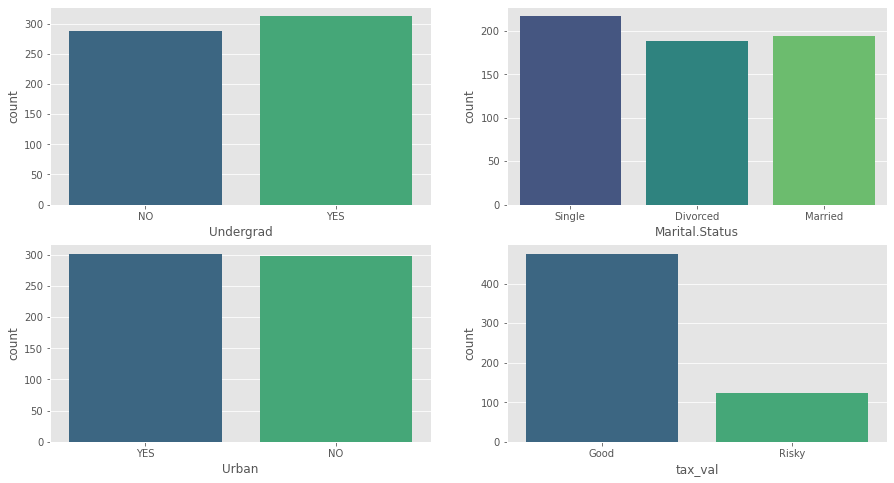

In [18]:
# countplot for visualization for categorical data
plt.style.use("ggplot")
fig, ax =plt.subplots(2,2, figsize=(15,8)) 
sns.countplot(data["Undergrad"], palette="viridis", ax=ax[0,0])
sns.countplot(data["Marital.Status"], palette="viridis", ax=ax[0,1])
sns.countplot(data["Urban"], palette="viridis", ax=ax[1,0])
sns.countplot(data["tax_val"], palette="viridis", ax=ax[1,1])

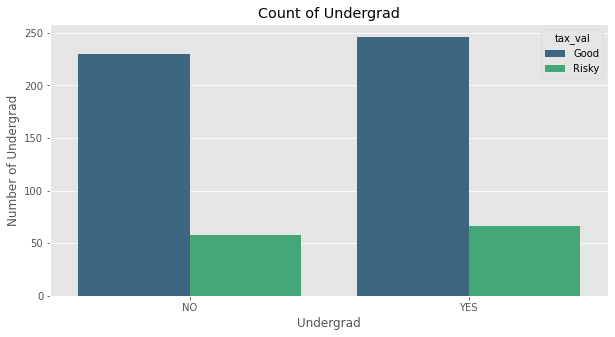

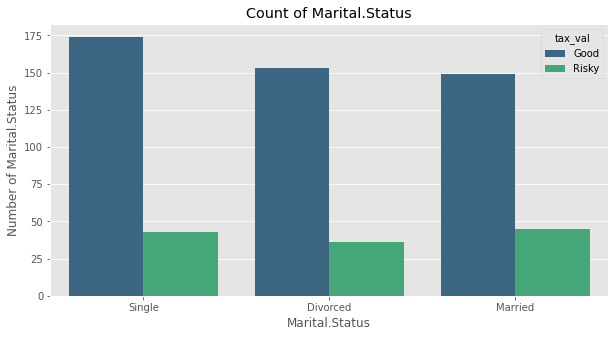

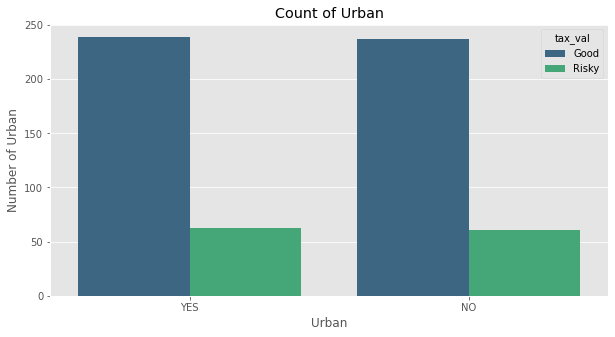

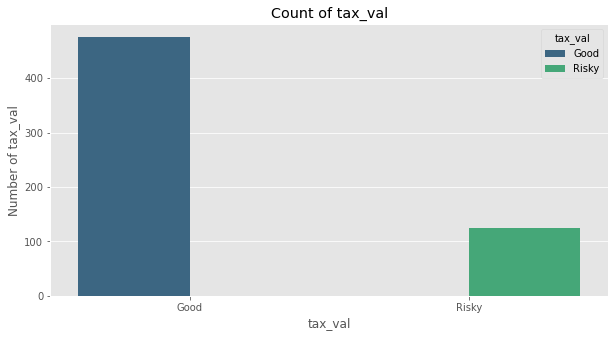

In [19]:
# visualization of categorical data w.r.t. Sales_cat
for var,column in enumerate(categorical_features):
    plt.figure(figsize=(10, 5))
    unique = data[column].value_counts(ascending=True);   
    plt.title("Count of "+ column)
    sns.countplot(data=data, x=column,palette = "viridis",hue='tax_val')
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)

Preson belonging to urbon and non-urbon are almost same and the risk value are for every feature are low 

### Checking for imblance and balanced dataset

In [20]:
data['tax_val'].value_counts()

Good     476
Risky    124
Name: tax_val, dtype: int64

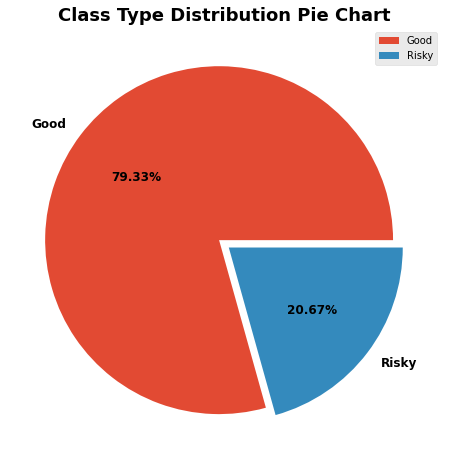

In [21]:
# pie plot for tax_val
plt.figure(figsize = (12,8))
plt.pie(data['tax_val'].value_counts(),labels=data.tax_val.unique(),explode = [0.04,0.03],autopct= '%.2f%%',
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

We have an imblance data.

## Data pre-processing

In [22]:
# Droping of unwanted columns
df= data.copy()
df.drop('Taxable.Income',axis=1, inplace =True)
df.head()

Undergrad Marital.Status  City.Population  Work.Experience Urban tax_val
0        NO         Single            50047               10   YES    Good
1       YES       Divorced           134075               18   YES    Good
2        NO        Married           160205               30   YES    Good
3       YES         Single           193264               15   YES    Good
4        NO        Married            27533               28    NO    Good

In [23]:
# use dummeis encoder for categorical features except target features 
df = pd.get_dummies(df.iloc[:,:-1])
df.head()

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
0            50047               10             1              0   
1           134075               18             0              1   
2           160205               30             1              0   
3           193264               15             0              1   
4            27533               28             1              0   

   Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
0                        0                       0                      1   
1                        1                       0                      0   
2                        0                       1                      0   
3                        0                       0                      1   
4                        0                       1                      0   

   Urban_NO  Urban_YES  
0         0          1  
1         0          1  
2         0          1  
3         0          1  
4         1          0

In [24]:
# rename of column and apply label encoder to target variables
df['tax_val'] = data.tax_val
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["tax_val"])
df["tax_val"]=le.transform(df["tax_val"])
df.head()

City.Population  Work.Experience  Undergrad_NO  Undergrad_YES  \
0            50047               10             1              0   
1           134075               18             0              1   
2           160205               30             1              0   
3           193264               15             0              1   
4            27533               28             1              0   

   Marital.Status_Divorced  Marital.Status_Married  Marital.Status_Single  \
0                        0                       0                      1   
1                        1                       0                      0   
2                        0                       1                      0   
3                        0                       0                      1   
4                        0                       1                      0   

   Urban_NO  Urban_YES  tax_val  
0         0          1        0  
1         0          1        0  
2         0          1        0  
3         0          1        0  
4         1          0        0

In [25]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
x = df.drop('tax_val',axis=1)
y = df[['tax_val']]
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std

array([[-1.17852072, -0.62914254,  1.040833  , ...,  1.32852435,
        -0.99335541,  0.99335541],
       [ 0.50850002,  0.27636996, -0.96076892, ..., -0.75271484,
        -0.99335541,  0.99335541],
       [ 1.03310911,  1.63463872,  1.040833  , ..., -0.75271484,
        -0.99335541,  0.99335541],
       ...,
       [ 0.90969648, -1.76103318,  1.040833  , ..., -0.75271484,
        -0.99335541,  0.99335541],
       [ 1.43219749,  0.1631809 , -0.96076892, ..., -0.75271484,
         1.00668904, -1.00668904],
       [ 0.9915901 ,  0.04999184,  1.040833  , ..., -0.75271484,
         1.00668904, -1.00668904]])

In [26]:
# Train_test Split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((420, 9), (420, 1), (180, 9), (180, 1))

## Hyperparameter tuning GridSearch using KFold Split on Imblanced dataset

#### KFold Validation 

In [27]:

from sklearn.model_selection import KFold,cross_val_score
clf_tree = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=None)

results = cross_val_score(clf_tree,x_std ,y , cv=cv)
print(results.mean())

0.63


#### GridSearchCV for Decission Tree on imblanced data

In [28]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 12))), 
    "min_samples_leaf":list(range(1, 20)), 
}
clf_grid=GridSearchCV(clf_tree, params,scoring="accuracy", n_jobs=-1, verbose=1, cv=cv,return_train_score=False)
clf_grid.fit(x_train,y_train)
clf_grid.best_score_
clf_grid.best_params_

Fitting 10 folds for each of 836 candidates, totalling 8360 fits


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'splitter': 'best'}

#### Model Bulding using gridsearch parameters on imblanced data

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
# build decission tree model from gridsearch parameters 
model=clf_grid.best_estimator_
#train test accuracy for checking overfitting and underfitting 
pred_test = model.predict(x_test)
print('Test data Accuracy  :',accuracy_score(y_test,pred_test))
pred_train = model.predict(x_train)

print('Train data Accuracy :',accuracy_score(y_train,pred_train))
print('Test Report',classification_report(y_test,pred_test))
print('Confusion matrix \n',confusion_matrix(y_test,pred_test))

Test data Accuracy  : 0.7444444444444445
Train data Accuracy : 0.8119047619047619
Test Report               precision    recall  f1-score   support

           0       0.76      0.97      0.85       137
           1       0.20      0.02      0.04        43

    accuracy                           0.74       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.74      0.66       180

Confusion matrix 
 [[133   4]
 [ 42   1]]


Due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

## Balance the Imblanced data using different technique

In [30]:
# Define function to build model for different technique 
def sampling(x_train,x_test,y_train,y_test):
    model=DecisionTreeClassifier(random_state=42)
    model.fit(x_train,y_train)
    pred_test_s=model.predict(x_test)
    print('Test classification Report\n',classification_report(y_test,pred_test_s))
    return()

#### Undersampling technique

In [31]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x_std, y)
y_under.value_counts()

tax_val
0          124
1          124
dtype: int64

In [32]:
#spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.3,random_state=42,stratify=y_under)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.48      0.42      0.45        38
           1       0.48      0.54      0.51        37

    accuracy                           0.48        75
   macro avg       0.48      0.48      0.48        75
weighted avg       0.48      0.48      0.48        75



()

#### Oversampling technique

In [33]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x_std, y)
y_over.value_counts()

tax_val
0          476
1          476
dtype: int64

In [34]:
# spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42,stratify=y_over)
# calling function
sampling(x_train,x_test,y_train,y_test)


Test classification Report
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       143
           1       0.81      0.97      0.88       143

    accuracy                           0.87       286
   macro avg       0.88      0.87      0.87       286
weighted avg       0.88      0.87      0.87       286



()

#### SMOTE technique

In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x_std,y)
y_sm.value_counts()

tax_val
0          476
1          476
dtype: int64

In [36]:
# spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=42,stratify=y_sm)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.62      0.59      0.60       143
           1       0.61      0.64      0.62       143

    accuracy                           0.61       286
   macro avg       0.61      0.61      0.61       286
weighted avg       0.61      0.61      0.61       286



()

#### ADASYN Technique

In [37]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN(sampling_strategy='minority')
x_ad,y_ad = smote.fit_resample(x_std,y)
y_ad.value_counts()

tax_val
0          476
1          476
dtype: int64

In [38]:
# spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_ad,y_ad,test_size=0.3,random_state=42,stratify=y_ad)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       143
           1       0.66      0.70      0.68       143

    accuracy                           0.67       286
   macro avg       0.67      0.67      0.67       286
weighted avg       0.67      0.67      0.67       286



()

By implementing different techinique to balance the imblance data we find that oversampling gives the best result. 

### GridSearchCV for Decission Tree on balanced data

In [39]:
# spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42,stratify=y_over)
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))),  
    "min_samples_leaf":list(range(1, 20)), 
}

clf_balanced = DecisionTreeClassifier()
clf_grid_balance=GridSearchCV(clf_balanced, params,scoring="accuracy", n_jobs=-1, verbose=1, cv=cv,return_train_score=False)
clf_grid_balance.fit(x_train,y_train)
clf_grid_balance.best_score_
clf_grid_balance.best_params_

Fitting 10 folds for each of 1444 candidates, totalling 14440 fits


{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
# build decission tree model from gridsearch parameters 
model_balance=clf_grid_balance.best_estimator_

#train test accuracy for checking overfitting and underfitting

pred_train_b = model_balance.predict(x_train)
print('Train data Accuracy :',accuracy_score(y_train,pred_train_b))
print('Train Report\n',classification_report(y_train,pred_train_b))
print('Confusion matrix of train \n',confusion_matrix(y_train,pred_train_b))

pred_test_b = model_balance.predict(x_test)
print('\n\nTest data Accuracy  :',accuracy_score(y_test,pred_test_b))
print('Test Report\n',classification_report(y_test,pred_test_b))
print('Confusion matrix of test \n',confusion_matrix(y_test,pred_test_b))

Train data Accuracy : 1.0
Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       333

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666

Confusion matrix of train 
 [[333   0]
 [  0 333]]


Test data Accuracy  : 0.8321678321678322
Test Report
               precision    recall  f1-score   support

           0       0.96      0.69      0.80       143
           1       0.76      0.97      0.85       143

    accuracy                           0.83       286
   macro avg       0.86      0.83      0.83       286
weighted avg       0.86      0.83      0.83       286

Confusion matrix of test 
 [[ 99  44]
 [  4 139]]


After appling balance data our model correctly classify majorit and minority classes. Train acuracy and test acuracy is not comparable it looks overfiting, so to overcome this problem we use pruning.

##  Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning

In [41]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(x_train,y_train)
pred_e=model_entropy.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred_e))
print('classification report',classification_report(y_test,pred_e))

Accuracy score 0.8286713286713286
classification report               precision    recall  f1-score   support

           0       0.95      0.69      0.80       143
           1       0.76      0.97      0.85       143

    accuracy                           0.83       286
   macro avg       0.86      0.83      0.83       286
weighted avg       0.86      0.83      0.83       286



In [42]:
# count Predicting on test data
pd.Series(pred_e).value_counts()

1    182
0    104
dtype: int64

In [43]:
# Creating cross tables for checking model
pd.crosstab(y_test.squeeze(), pred_e)

col_0     0    1
tax_val         
0        99   44
1         5  138

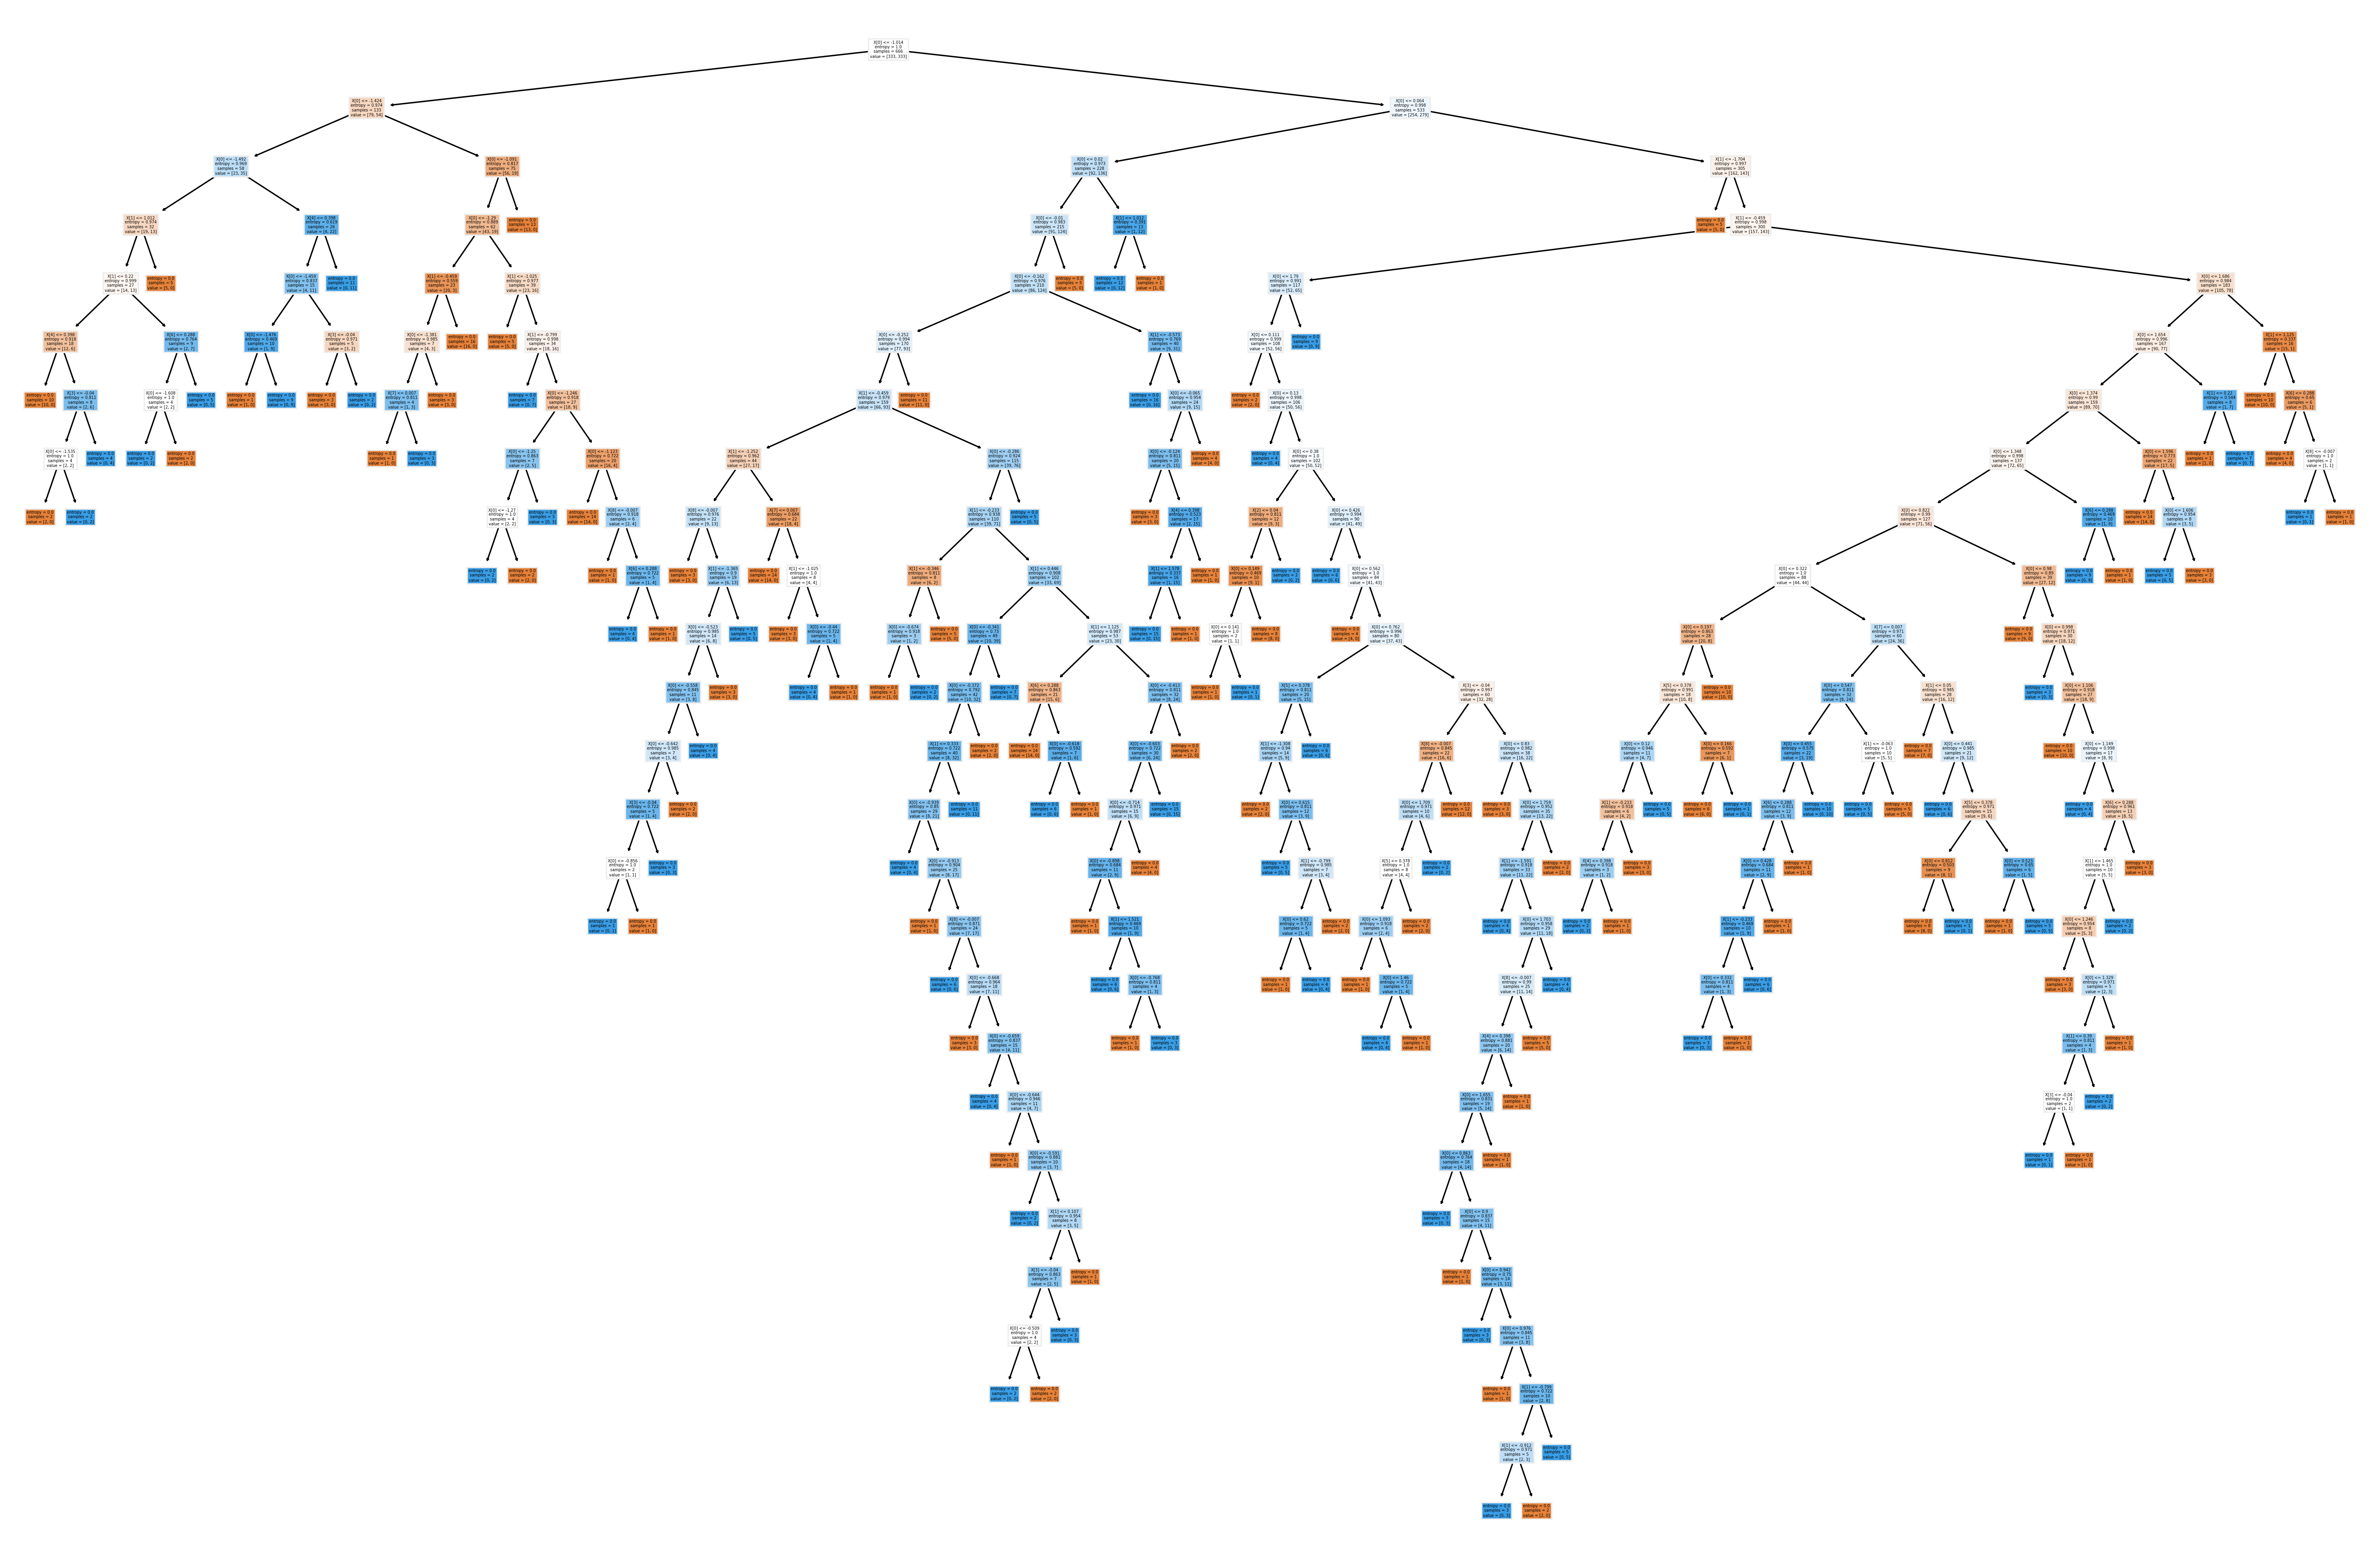

In [44]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [45]:
# implementing all alpha values
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.012672505927382375


#### Accuracy vs alpha for training and testing sets

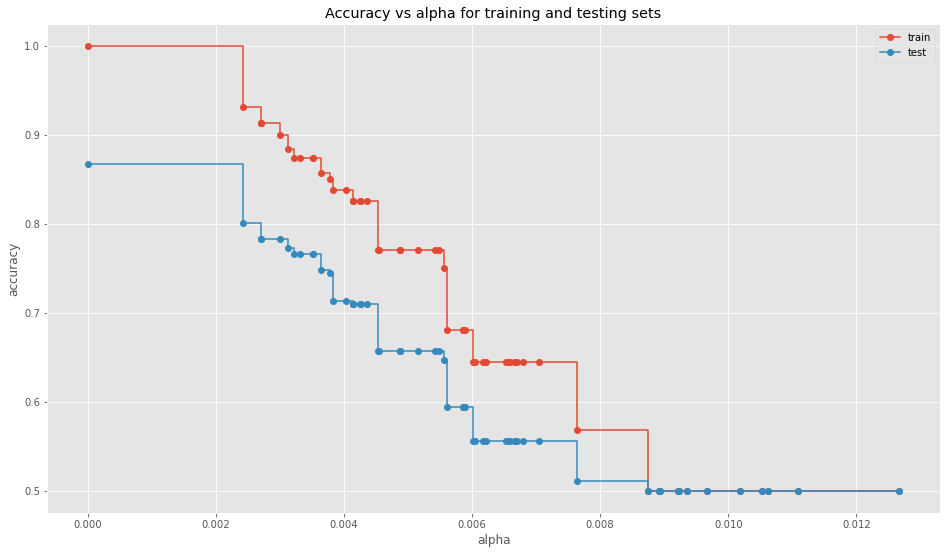

In [46]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [47]:
ccp_alphas

array([0.        , 0.00242981, 0.00270102, 0.00270994, 0.003003  ,
       0.0031238 , 0.00322425, 0.00330815, 0.00352099, 0.00352099,
       0.00364471, 0.00378782, 0.00382449, 0.00403897, 0.00413647,
       0.00413647, 0.00413647, 0.00425596, 0.00427119, 0.00436434,
       0.00453592, 0.00453948, 0.00487254, 0.00487254, 0.00487254,
       0.00516354, 0.00541988, 0.00548271, 0.00556959, 0.00560861,
       0.00585306, 0.00585606, 0.00588809, 0.00600909, 0.00604502,
       0.00617097, 0.00621878, 0.0065293 , 0.00657256, 0.00659213,
       0.00666572, 0.0066693 , 0.0066989 , 0.00680079, 0.00704198,
       0.00763689, 0.00874007, 0.00891671, 0.00893675, 0.00921892,
       0.00922747, 0.00935909, 0.00966494, 0.01017854, 0.01052771,
       0.01061902, 0.01109584, 0.01267251])

Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [60]:
# Building model with alpha value
clf_e = DecisionTreeClassifier(criterion='entropy',random_state=42, ccp_alpha= 0.01017854)
clf_e.fit(x_train,y_train)
pred_test=clf_e.predict(x_test)
pred_train=clf_e.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

Training Accuracy 0.6426426426426426 
Testing Accuracy 0.5594405594405595
[[109  34]
 [ 92  51]]
              precision    recall  f1-score   support

           0       0.54      0.76      0.63       143
           1       0.60      0.36      0.45       143

    accuracy                           0.56       286
   macro avg       0.57      0.56      0.54       286
weighted avg       0.57      0.56      0.54       286



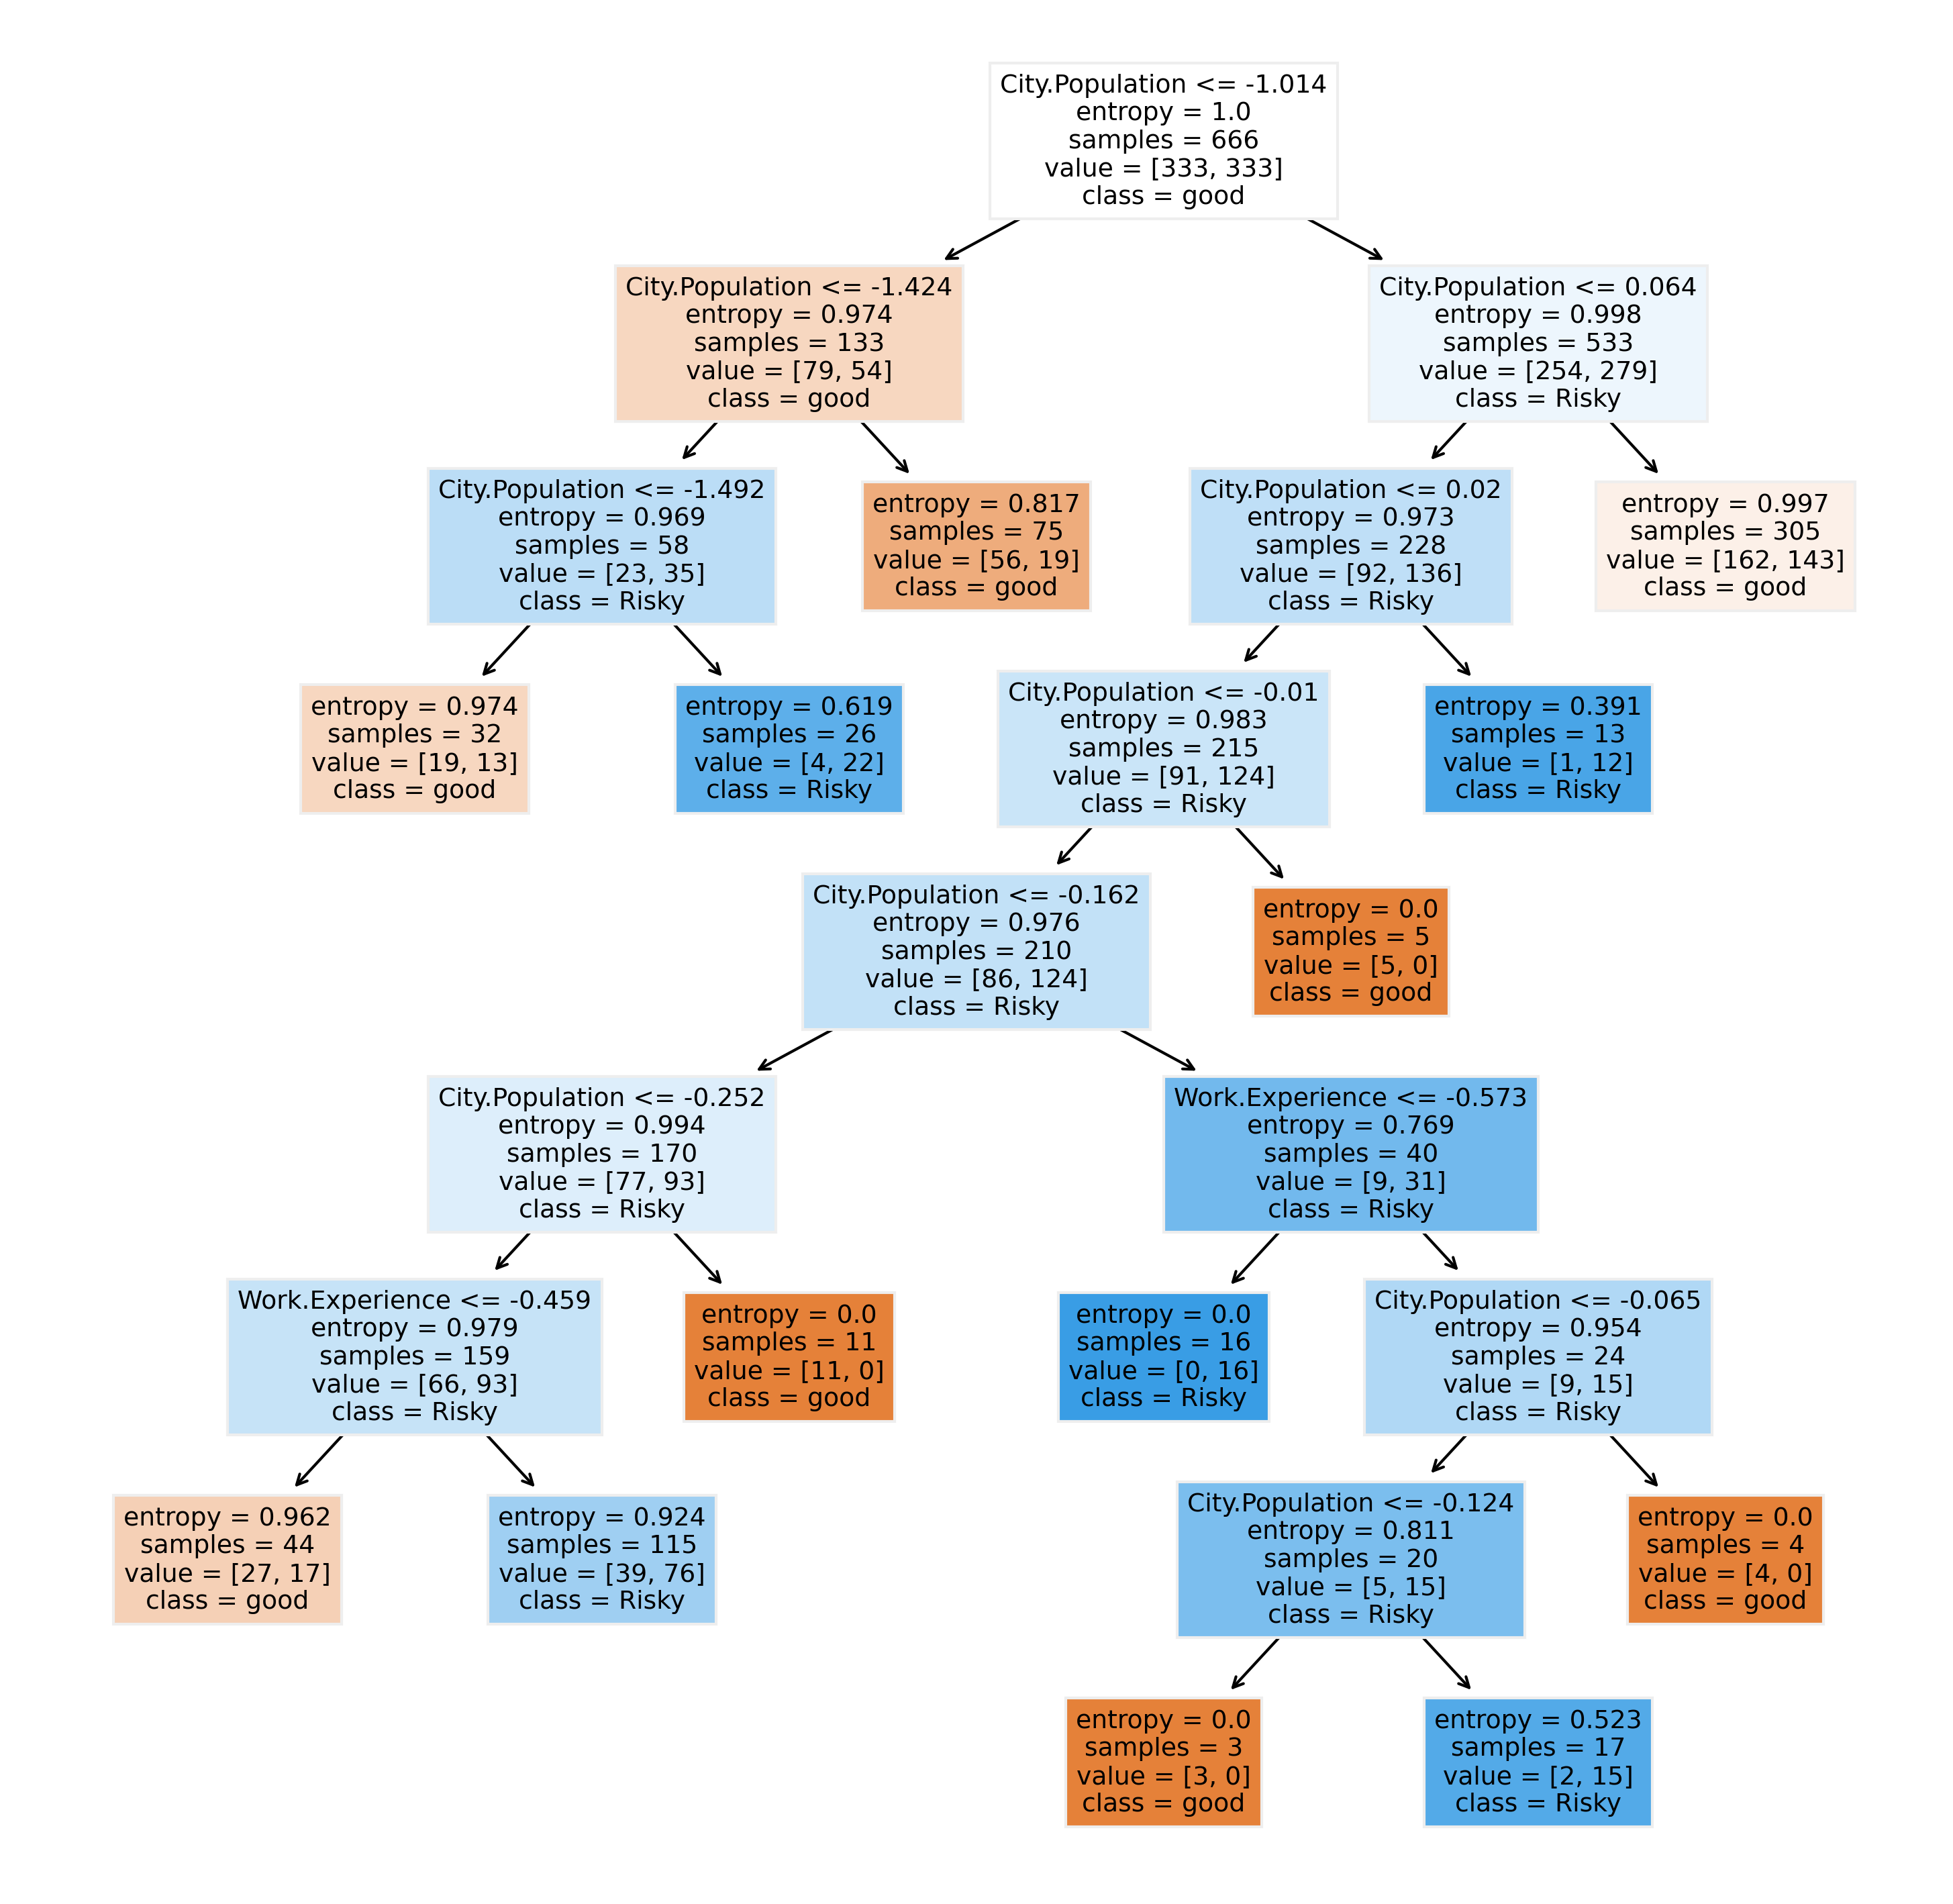

In [61]:
#PLot the decision tree
fn=['City.Population', 'Work.Experience', 'Undergrad', 'Marital.Status', 'Urban']
cn=['good','Risky']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(clf_e,feature_names = fn, class_names=cn,filled = True);

## Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

In [62]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(x_train,y_train)
pred_g = model_gini.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred_g))
print('classification report\n',classification_report(y_test,pred_g))


Accuracy score 0.8671328671328671
classification report
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       143
           1       0.81      0.97      0.88       143

    accuracy                           0.87       286
   macro avg       0.88      0.87      0.87       286
weighted avg       0.88      0.87      0.87       286



In [63]:
# count Predicting on test data
pd.Series(pred_g).value_counts()

1    171
0    115
dtype: int64

In [64]:
# Creating cross tables for checking model
pd.crosstab(y_test.squeeze(), pred_g)

col_0      0    1
tax_val          
0        110   33
1          5  138

In [65]:
# implementing all alpha values
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.00829636061129426


#### Accuracy vs alpha for training and testing sets

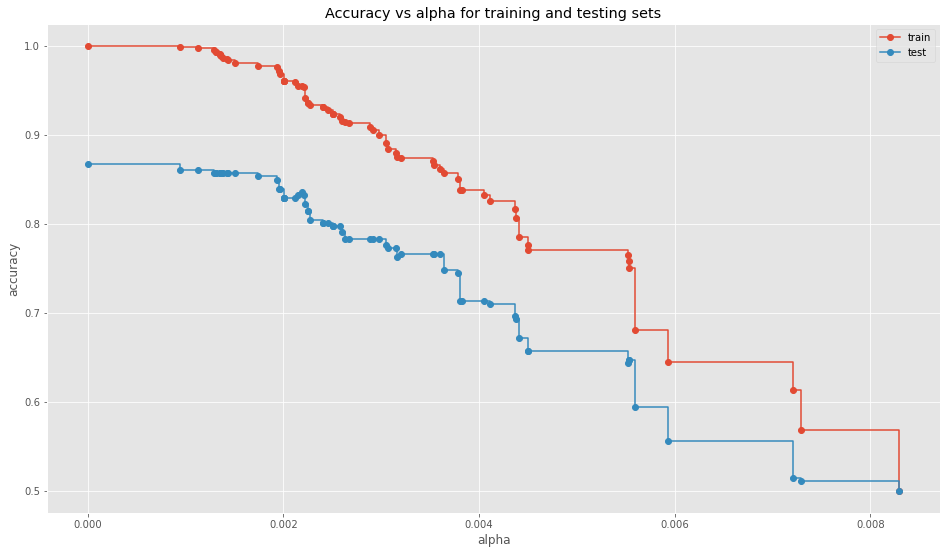

In [66]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [67]:
ccp_alphas

array([0.        , 0.00093844, 0.00112613, 0.001287  , 0.00131381,
       0.00131381, 0.00135135, 0.00135135, 0.001365  , 0.001386  ,
       0.00141808, 0.00143   , 0.0015015 , 0.00173507, 0.0019305 ,
       0.00195195, 0.00196219, 0.002002  , 0.002002  , 0.002002  ,
       0.002002  , 0.00211461, 0.00214381, 0.00218969, 0.0022113 ,
       0.00222074, 0.00225225, 0.00225225, 0.002275  , 0.0024024 ,
       0.0024024 , 0.002457  , 0.0025025 , 0.0025025 , 0.0025025 ,
       0.002574  , 0.00259784, 0.00262763, 0.00266934, 0.00288806,
       0.0029124 , 0.00298076, 0.0030492 , 0.00306557, 0.00315315,
       0.00315767, 0.0032032 , 0.00352526, 0.00354323, 0.0036036 ,
       0.0036424 , 0.00378584, 0.00380201, 0.003822  , 0.00405405,
       0.00410705, 0.004368  , 0.00438148, 0.00440805, 0.00449732,
       0.0045045 , 0.00551802, 0.00552826, 0.00553185, 0.00558923,
       0.0059331 , 0.00721054, 0.00728557, 0.00829636])

Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other

In [79]:
# Building model with alpha value
clf_g = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha= 0.00558923)
clf_g.fit(x_train,y_train)
pred_test=clf_g.predict(x_test)
pred_train=clf_g.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

Training Accuracy 0.6801801801801802 
Testing Accuracy 0.5944055944055944
[[91 52]
 [64 79]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       143
           1       0.60      0.55      0.58       143

    accuracy                           0.59       286
   macro avg       0.60      0.59      0.59       286
weighted avg       0.60      0.59      0.59       286



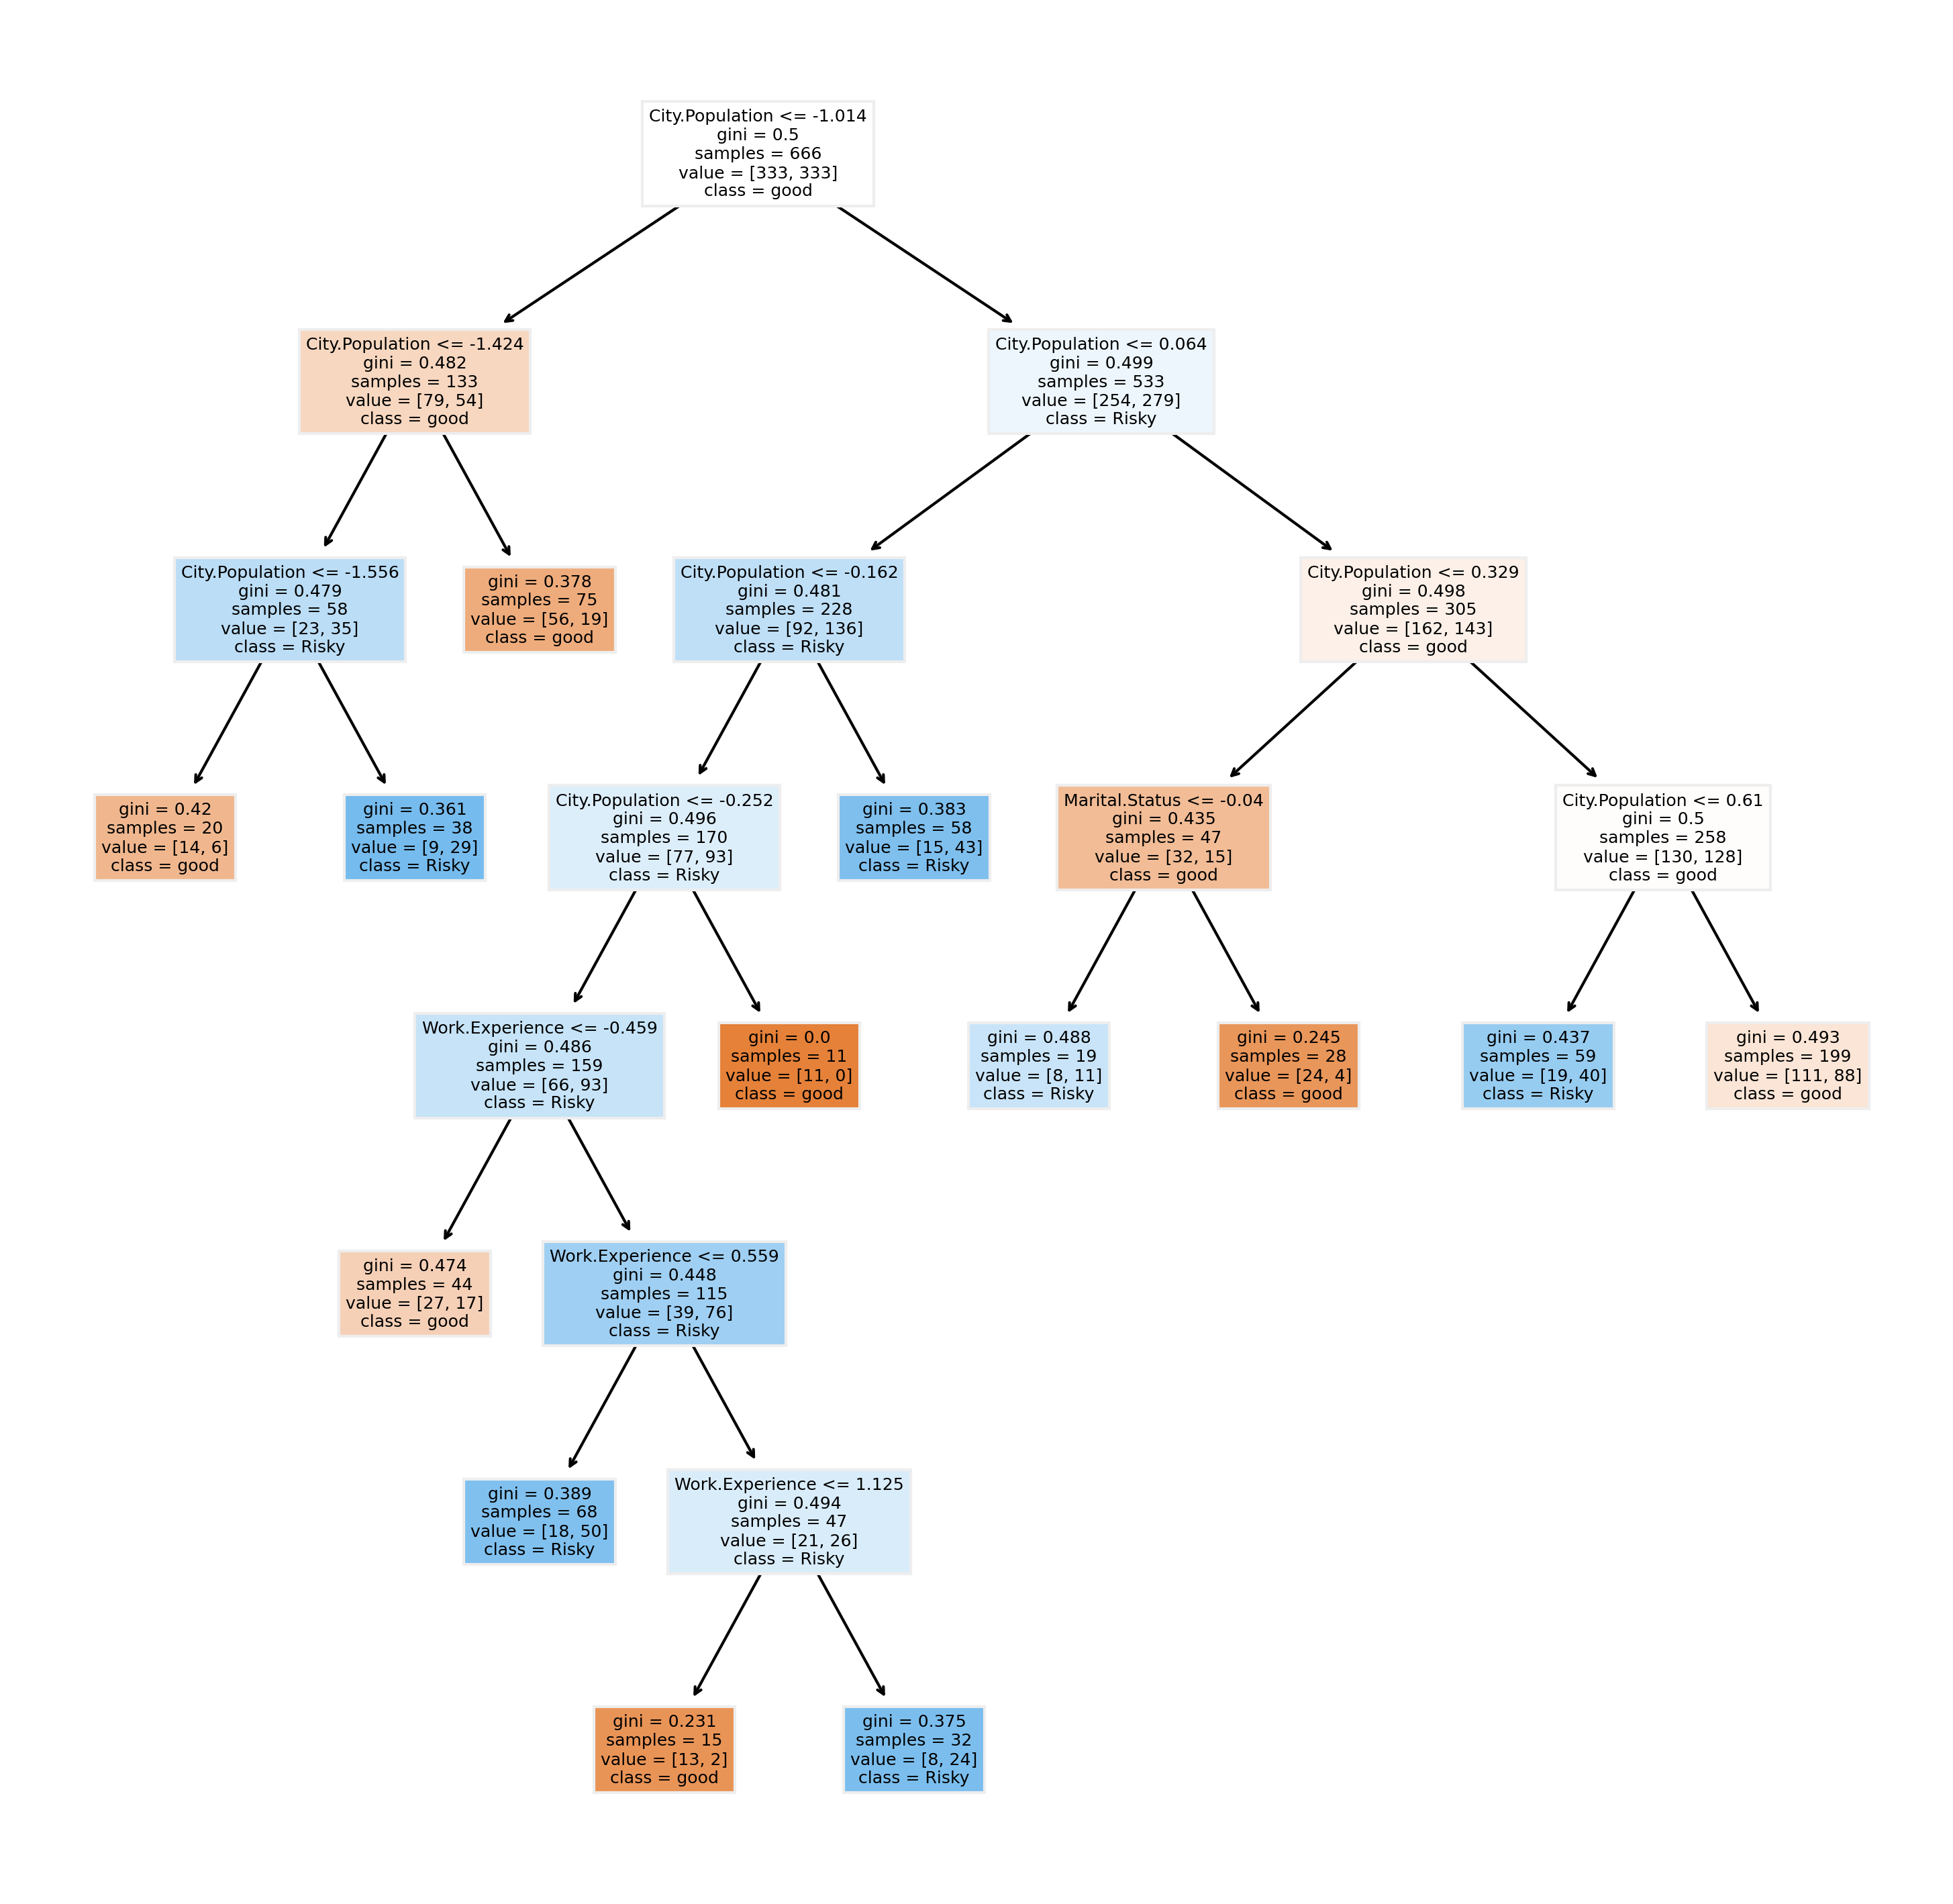

In [80]:
#PLot the decision tree
fn=['City.Population', 'Work.Experience', 'Undergrad', 'Marital.Status', 'Urban']
cn=['good','Risky']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(clf_g,feature_names = fn, class_names=cn,filled = True);

## Decision Tree Regression

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
k = [2,3,4,5,6,7,8] 
for n in k:
    model_reg = DecisionTreeRegressor(max_depth=n)
    model_reg.fit(x_train,y_train)
    pred_test_reg = model_reg.predict(x_test)
    print('Test data Accuracy at max_depth=',n,'is :',accuracy_score(y_test,pred_test_reg))
    pred_train_reg = model_reg.predict(x_train)
    print('Train data Accuracy at max_depth=',n,'is :',accuracy_score(y_train,pred_train_reg))
    print()

Test data Accuracy at max_depth= 2 is : 0.4825174825174825
Train data Accuracy at max_depth= 2 is : 0.5840840840840841

Test data Accuracy at max_depth= 3 is : 0.4965034965034965
Train data Accuracy at max_depth= 3 is : 0.5960960960960962

Test data Accuracy at max_depth= 4 is : 0.5734265734265734
Train data Accuracy at max_depth= 4 is : 0.6561561561561562

Test data Accuracy at max_depth= 5 is : 0.6433566433566433
Train data Accuracy at max_depth= 5 is : 0.7027027027027027

Test data Accuracy at max_depth= 6 is : 0.6713286713286714
Train data Accuracy at max_depth= 6 is : 0.7402402402402403

Test data Accuracy at max_depth= 7 is : 0.7342657342657343
Train data Accuracy at max_depth= 7 is : 0.8048048048048048

Test data Accuracy at max_depth= 8 is : 0.7832167832167832
Train data Accuracy at max_depth= 8 is : 0.8528528528528528



In [82]:
# count Predicting on test data
pd.Series(pred_test_reg).value_counts()

1    163
0    123
dtype: int64

In [83]:
# Creating cross tables for checking model
pd.crosstab(y_test.squeeze(), pred_test_reg)

col_0      0    1
tax_val          
0        102   41
1         21  122

In [84]:
# Building model with alpha value
clf_r = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_r.fit(x_train,y_train)
pred_test=clf_r.predict(x_test)
pred_train=clf_r.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test,pred_test))

Training Accuracy 0.5960960960960962 
Testing Accuracy 0.4965034965034965
[[80 63]
 [81 62]]
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       143
           1       0.50      0.43      0.46       143

    accuracy                           0.50       286
   macro avg       0.50      0.50      0.49       286
weighted avg       0.50      0.50      0.49       286



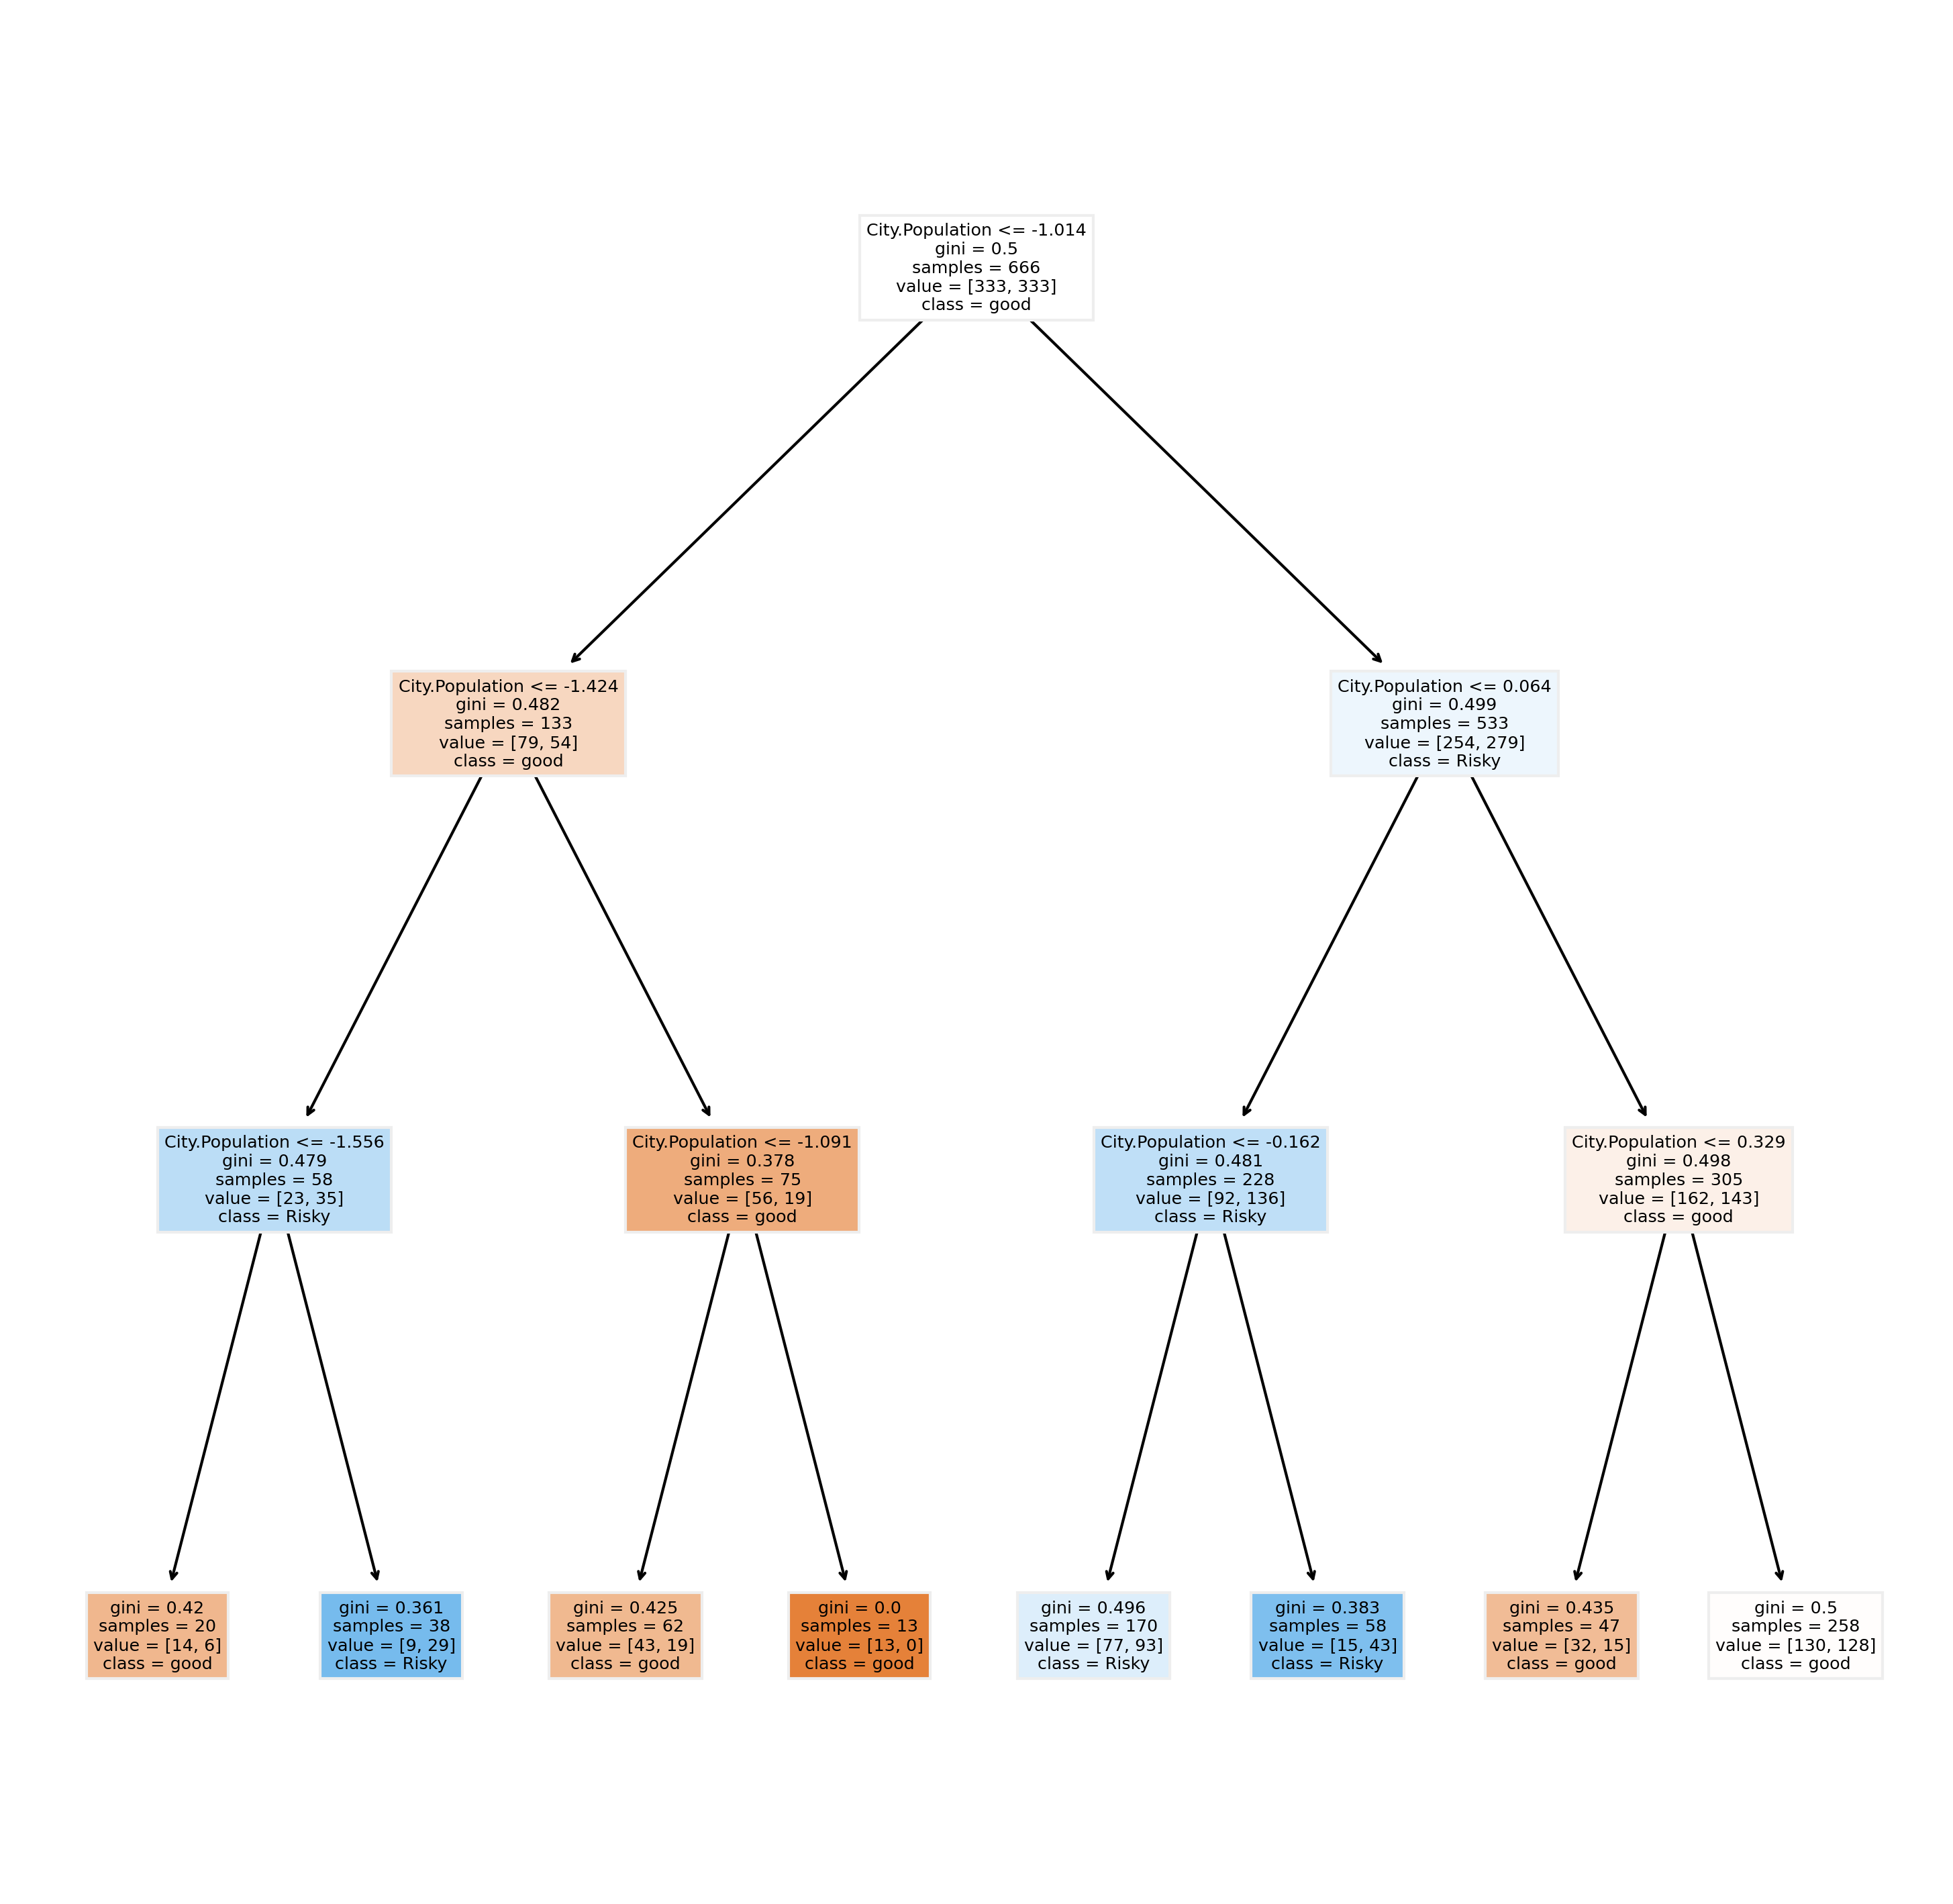

In [85]:
#PLot the decision tree
fn=['City.Population', 'Work.Experience', 'Undergrad', 'Marital.Status', 'Urban']
cn=['good','Risky']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(clf_r,feature_names = fn, class_names=cn,filled = True);

### Prediction for new data using CART Model

In [90]:
clf_r.predict([[134075,18,0,1,1,0,0,0,1]])


array([0])

## Conclusion
+ We have categorice the Taxable_Income in two category high and low
+ we use Randomoversampler to blance the data.
+ when we puring the tree to overcome the overfitting the gini criterion perform good
+ F1 score of both the criterion is same but the obtained results using the gini criterion are slightly better.
+ DecissionTree Regression does not perform in compare giniand entropy.
+ As we show the tree the city pollution has high degree of uncertanity.

